In [1]:
# Feature Eng TODO Checklist:
# 1. Clean data
# 2. EDA -> Distributions, etc.
# 3. Find external datasets we wish to use (i.e. 'Spain' dataset, for instance?)
# 4. Feature engineering
# 5. Feature selection
# 6. Oversampling 

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx 

In [3]:
# load data
root_dir = './DataFiles/'
train_file = root_dir + 'CreditCard_train.csv'
test_file = root_dir + 'CreditCard_test.csv'

_df_train = pd.read_csv(train_file, index_col=0, header=1).rename(columns={'PAY_0':'PAY_1'})
_df_test = pd.read_csv(test_file, index_col=0, header=1).rename(columns={'PAY_0':'PAY_1'})

In [4]:
# correlation matrix excl. target
df_train_vars = _df_train.iloc[:, :-1]
df_corr = df_train_vars.corr()

# extract feature names for nodes
features = df_corr.index.values

# convert to numpy matrix
corr_matrix = np.asmatrix(df_corr)

# extract correlations with target label
target_corr = _df_train.corr().iloc[-1, :-1].to_numpy()

In [5]:
# Creates graph using the data from the correlation matrix
G = nx.from_numpy_matrix(corr_matrix)

# relabels nodes to match features
G = nx.relabel_nodes(G, lambda x: features[x])

# shows the edges with their corresponding weights
G.edges(data=True)

EdgeDataView([('LIMIT_BAL', 'LIMIT_BAL', {'weight': 1.0}), ('LIMIT_BAL', 'SEX', {'weight': 0.033670587153002515}), ('LIMIT_BAL', 'EDUCATION', {'weight': -0.2293454158848543}), ('LIMIT_BAL', 'MARRIAGE', {'weight': -0.10462031129978691}), ('LIMIT_BAL', 'AGE', {'weight': 0.14588295499742418}), ('LIMIT_BAL', 'PAY_1', {'weight': -0.26636186894419267}), ('LIMIT_BAL', 'PAY_2', {'weight': -0.29541284599026546}), ('LIMIT_BAL', 'PAY_3', {'weight': -0.28538890659707444}), ('LIMIT_BAL', 'PAY_4', {'weight': -0.2626933943561546}), ('LIMIT_BAL', 'PAY_5', {'weight': -0.245786852149052}), ('LIMIT_BAL', 'PAY_6', {'weight': -0.23301555235405508}), ('LIMIT_BAL', 'BILL_AMT1', {'weight': 0.2860993975151338}), ('LIMIT_BAL', 'BILL_AMT2', {'weight': 0.28025171983826125}), ('LIMIT_BAL', 'BILL_AMT3', {'weight': 0.28705644103876515}), ('LIMIT_BAL', 'BILL_AMT4', {'weight': 0.29661326558396184}), ('LIMIT_BAL', 'BILL_AMT5', {'weight': 0.296821389170541}), ('LIMIT_BAL', 'BILL_AMT6', {'weight': 0.2915715870968482}), (

In [6]:
# Function to display the BASIC graph

def create_corr_network_1(G):
    # create list for the edges and for the weights
    edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())
    
    # increase weight values to make vals more distinct 
    weights = tuple([(1 + abs(x))**2 for x in weights])
    
    # positions
    positions = nx.circular_layout(G)
    
    # fig size
    plt.figure(figsize=(15,15))
    
    # draws nodes
    nx.draw_networkx_nodes(G, 
                           positions, 
                           node_color='#DA70D6',
                           node_size=500, 
                           alpha=0.8)
    
    # styling for labels
    nx.draw_networkx_labels(G, 
                            positions, 
                            font_size=8,
                            font_family='sans-serif')
    
    # color setting
    main_color = plt.cm.GnBu
    
    # draws the edges
    nx.draw_networkx_edges(G, 
                           positions, 
                           edgelist=edges, 
                           style='solid',
                           width=weights,
                           edge_color=weights,
                           edge_cmap=main_color,
                           edge_vmin=min(weights),
                           edge_vmax=max(weights))
    
    # displays the graph without axis
    plt.axis('off')

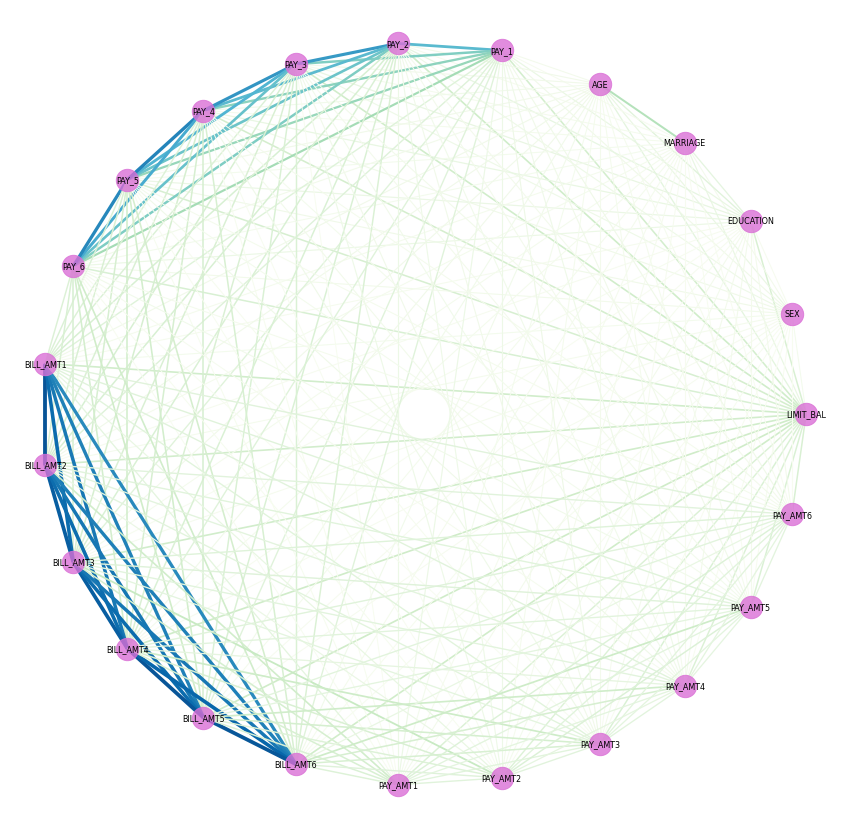

In [7]:
# check basic corr graph
create_corr_network_1(G)

In [8]:
# Function to display the graph, with two added functionalities
# 1. Include only those edges whose correlation exceeds min_corr
# 2. Include only those edges whose correlation is positive or negative

def create_corr_network_2(G, corr_dir, min_corr):
    
    # creates a copy of the graph
    H = G.copy()
    
    # checks all edges and removes some based on corr_dir, and min_corr
    for feat_1, feat_2, weight in G.edges(data=True):
        if corr_dir == 'positive':
            if weight['weight'] < 0 or abs(weight['weight']) < min_corr:
                H.remove_edge(feat_1, feat_2)
        else:
            if weight['weight'] >= 0 or abs(weight['weight']) < min_corr:
                H.remove_edge(feat_1, feat_2)
                
    # create list for the edges and for the weights
    edges, weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    # increase weight values to make vals more distinct 
    weights = tuple([(1 + abs(x))**2 for x in weights])
    
    # positions
    positions = nx.circular_layout(H)
    
    # fig size
    plt.figure(figsize=(15,15))
    
    # draws nodes
    nx.draw_networkx_nodes(H, 
                           positions, 
                           node_color='#DA70D6',
                           node_size=500, 
                           alpha=0.8)
    
    # styling for labels
    nx.draw_networkx_labels(H, 
                            positions, 
                            font_size=8,
                            font_family='sans-serif')
    
    # color setting
    if corr_dir == 'positive':
        main_color = plt.cm.GnBu
    else:
        main_color = plt.cm.PuRd
    
    # draws the edges
    nx.draw_networkx_edges(H, 
                           positions, 
                           edgelist=edges, 
                           style='solid',
                           width=weights,
                           edge_color=weights,
                           edge_cmap=main_color,
                           edge_vmin=min(weights),
                           edge_vmax=max(weights))
    
    # displays the graph without axis
    plt.axis('off')

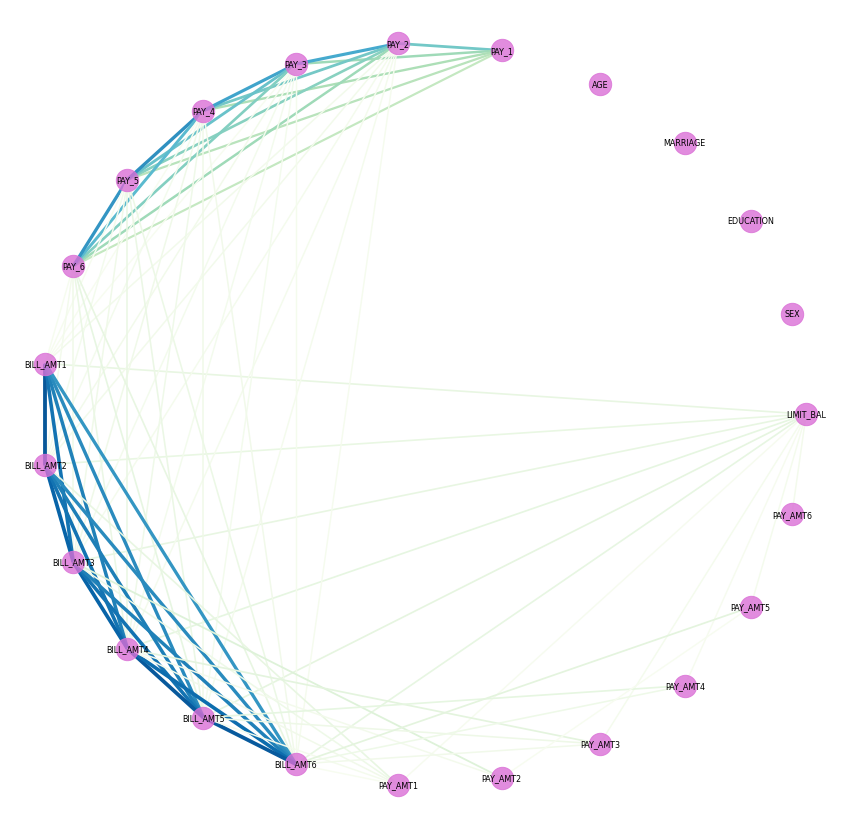

In [9]:
# check positive correlations
create_corr_network_2(G, 'positive', 0.2)

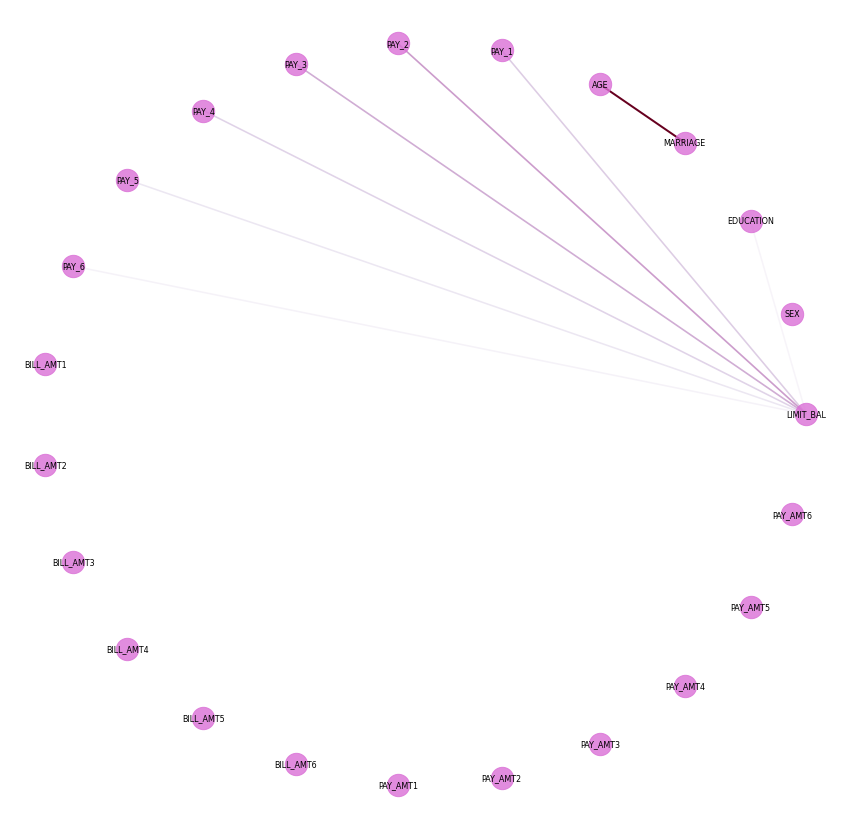

In [10]:
# check negative correlations
create_corr_network_2(G, 'negative', 0.2)

In [11]:
# Function to display the graph, now making the size of the nodes
# reflect the number of edges connected to the node 
# (proxy for its "importance")

def create_corr_network_3(G, corr_dir, min_corr):
    
    # creates a copy of the graph
    H = G.copy()
    
    # checks all edges and removes some based on corr_dir, and min_corr
    for feat_1, feat_2, weight in G.edges(data=True):
        if corr_dir == 'positive':
            if weight['weight'] < 0 or abs(weight['weight']) < min_corr:
                H.remove_edge(feat_1, feat_2)
        else:
            if weight['weight'] >= 0 or abs(weight['weight']) < min_corr:
                H.remove_edge(feat_1, feat_2)
                
    # create list for the edges and for the weights
    edges, weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    # increase weight values to make vals more distinct 
    weights = tuple([(1 + abs(x))**2 for x in weights])
    
    # calculates degree of each node
    nodelist, node_sizes = zip(*nx.degree(H))
    
    # positions
    positions = nx.circular_layout(H)
    
    # fig size
    plt.figure(figsize=(15,15))
    
    # draws nodes
    nx.draw_networkx_nodes(H, 
                           positions, 
                           node_color='#DA70D6',
                           nodelist=nodelist,
                           node_size=[x**3 for x in node_sizes], 
                           alpha=0.8)
    
    # styling for labels
    nx.draw_networkx_labels(H, 
                            positions, 
                            font_size=8,
                            font_family='sans-serif')
    
    # color setting
    if corr_dir == 'positive':
        main_color = plt.cm.GnBu
    else:
        main_color = plt.cm.PuRd
    
    # draws the edges
    nx.draw_networkx_edges(H, 
                           positions, 
                           edgelist=edges, 
                           style='solid',
                           width=weights,
                           edge_color=weights,
                           edge_cmap=main_color,
                           edge_vmin=min(weights),
                           edge_vmax=max(weights))
    
    # displays the graph without axis
    plt.axis('off')

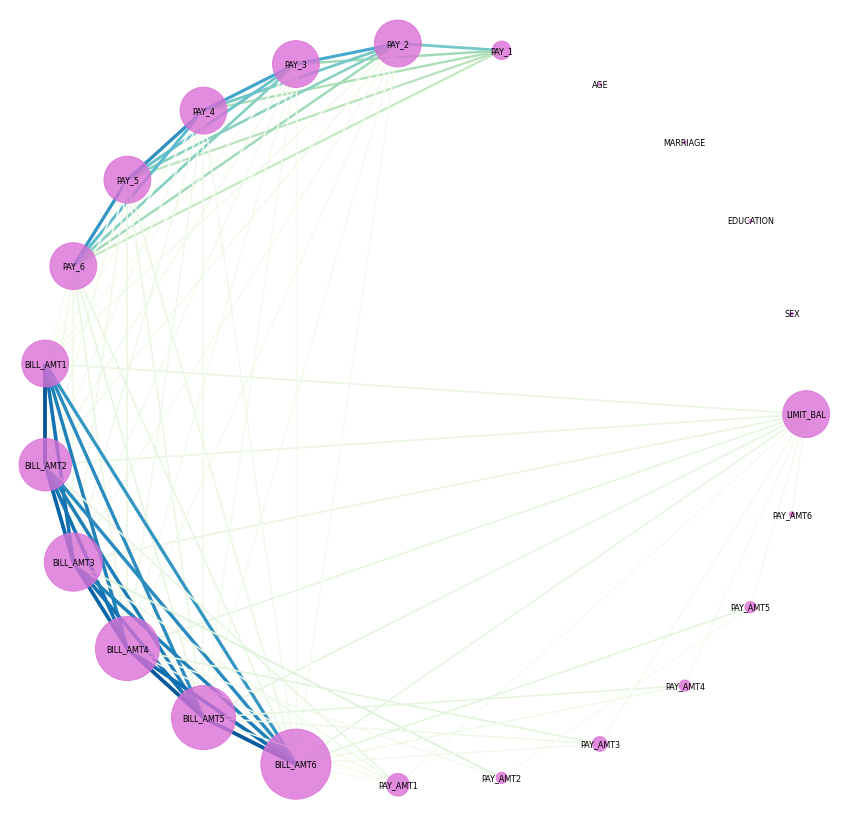

In [12]:
# check positive
create_corr_network_3(G, 'positive', 0.2)

In [13]:
# check negative
create_corr_network(G, 'negative', 0.2)

NameError: name 'create_corr_network' is not defined

In [ ]:
# Now, we want to augment this graph by including a 
# consideration of the correlation between each feature 
# and the target label. 
#
# Following the work of Hu, Ren, and Wang (2019), we compute
# the product between the feature's correlation with the target
# label and the sum of its correlations with other features

In [ ]:
edges = G.edges(data=True)
total_corr = {}

# iterate over features and sum over correlations with OTHER features
# to compute total corr
for feat in features:
    total_corr[feat] = 0
    for edge in edges:
        if edge[0] == feat:
            if edge[1] != feat:
                total_corr[feat] += edge[2]['weight']
                
# multiply total corr for each feature by the feature's correlation with
# the target label
total_weights = {}
for i, feat in enumerate(features):
    total_weights[feat] = total_corr[feat] * abs(target_corr[i])

In [ ]:
# check
total_weights

In [ ]:
# repeat last function for node sizing, but this time sizing nodes
# accoridng to their 'total_weight'

def create_corr_network_4(G, corr_dir, min_corr, sizes):
    
    # creates a copy of the graph
    H = G.copy()
    
    # checks all edges and removes some based on corr_dir, and min_corr
    for feat_1, feat_2, weight in G.edges(data=True):
        if corr_dir == 'positive':
            if weight['weight'] < 0 or abs(weight['weight']) < min_corr:
                H.remove_edge(feat_1, feat_2)
        else:
            if weight['weight'] >= 0 or abs(weight['weight']) < min_corr:
                H.remove_edge(feat_1, feat_2)
                
    # create list for the edges and for the weights
    edges, weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    # increase weight values to make vals more distinct 
    weights = tuple([(1 + abs(x))**2 for x in weights])
    
    # calculates degree of each node
    nodelist, node_sizes = zip(*nx.degree(H))
    
    # positions
    positions = nx.circular_layout(H)
    
    # fig size
    plt.figure(figsize=(15,15))
    
    # draws nodes
    nx.draw_networkx_nodes(H, 
                           positions, 
                           node_color='#DA70D6',
                           nodelist=nodelist,
                           node_size=[abs(x)*5000 for x in sizes.values()], 
                           alpha=0.8)
    
    # styling for labels
    nx.draw_networkx_labels(H, 
                            positions, 
                            font_size=8,
                            font_family='sans-serif')
    
    # color setting
    if corr_dir == 'positive':
        main_color = plt.cm.GnBu
    else:
        main_color = plt.cm.PuRd
    
    # draws the edges
    nx.draw_networkx_edges(H, 
                           positions, 
                           edgelist=edges, 
                           style='solid',
                           width=weights,
                           edge_color=weights,
                           edge_cmap=main_color,
                           edge_vmin=min(weights),
                           edge_vmax=max(weights))
    
    # displays the graph without axis
    plt.axis('off')

In [ ]:
# positive graph
create_corr_network_4(G, 'positive', 0.2, total_weights)

In [ ]:
# negative graph
create_corr_network_4(G, 'negative', 0.2, total_weights)

In [ ]:
# to be able to select the 'top n' variables, we want to order 'total_weights'
# to do so, we sort the keys of the 'total_weights' dict and create a new,
# sorted dict

# order total_weights by size
sorted_feats = sorted(total_weights, key=total_weights.get, reverse=True)

# sort values
sorted_weights = {}
for feat in sorted_feats:
    sorted_weights[feat] = total_weights[feat]
    
# print
print(sorted_weights)

In [ ]:
# From here, we can choose the top n features in a principled way